# Advance Regression: Predicting House Price

## Importing Libraries

In [652]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing dataset

In [653]:
df=pd.read_csv('train.csv')

In [654]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Checking dataset size

In [655]:
df.shape

(1460, 81)

## EDA 

In [656]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

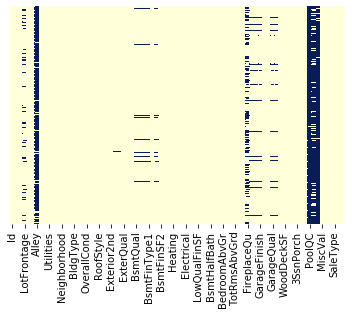

In [657]:

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

## Removing features having more than 40% records NaN

In [658]:
Del_col=df.isnull().sum()>650


In [659]:
col_to_be_deleted=Del_col[Del_col].index.tolist()
col_to_be_deleted

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [660]:
df=df.drop(col_to_be_deleted,axis=1)   # droped 5 column in which more than 40% data is missing

In [661]:
df.shape  

(1460, 76)

## Handling missing values

In [662]:
# Columns needs to handle missing values

MissHandle_col=df.isnull().sum()>0
MissHandle_col

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
                 ...  
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
GarageType        True
GarageYrBlt       True
GarageFinis

In [533]:
col_to_be_handle=MissHandle_col[MissHandle_col].index.tolist()
col_to_be_handle

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [663]:
df[col_to_be_handle].head()


,BsmtQual,GarageType,GarageFinish,GarageQual
0,Gd,Attchd,RFn,TA
1,Gd,Attchd,RFn,TA
2,Gd,Attchd,RFn,TA
3,TA,Detchd,Unf,TA
4,Gd,Attchd,RFn,TA


In [664]:
df[col_to_be_handle].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
BsmtQual        1423 non-null object
GarageType      1379 non-null object
GarageFinish    1379 non-null object
GarageQual      1379 non-null object
dtypes: object(4)
memory usage: 45.7+ KB


## Using mean to replace numerical missing values

In [665]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mean())


In [666]:
df[col_to_be_handle].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
BsmtQual        1423 non-null object
GarageType      1379 non-null object
GarageFinish    1379 non-null object
GarageQual      1379 non-null object
dtypes: object(4)
memory usage: 45.7+ KB


## Handling year feature missing value using random year

In [667]:
df['GarageYrBlt']=df['GarageYrBlt'].fillna(np.random.randint(1920,2005))

In [668]:
MissHandle_col=df.isnull().sum()>0
col_to_be_handle=MissHandle_col[MissHandle_col].index.tolist()
df[col_to_be_handle].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
MasVnrType      1452 non-null object
BsmtQual        1423 non-null object
BsmtCond        1423 non-null object
BsmtExposure    1422 non-null object
BsmtFinType1    1423 non-null object
BsmtFinType2    1422 non-null object
Electrical      1459 non-null object
GarageType      1379 non-null object
GarageFinish    1379 non-null object
GarageQual      1379 non-null object
GarageCond      1379 non-null object
dtypes: object(11)
memory usage: 125.5+ KB


## Below two cols has very less no of missing values so replacing then with "Mode"

In [669]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0]) # replacing with mode because there are only 8 missing data
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0]) # only one missing value


### Let's see now how many cols lest with missing values and count of missing values

In [672]:
MissHandle_col=df.isnull().sum()>0
col_to_be_handle=MissHandle_col[MissHandle_col].index.tolist()
df[col_to_be_handle].isnull().sum()

BsmtQual         2
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [673]:
# WE can see mostly TA and GD type is there so better fill the NA with permutation df['BsmtQual'] values
permutation = np.random.permutation(df['BsmtQual'])
empty_is = np.where(permutation == "")
permutation = np.delete(permutation, empty_is)
end = len(permutation)
df['BsmtQual'] = df['BsmtQual'].apply(lambda x: permutation[np.random.randint(end)] if pd.isnull(x) else x)


### So, we can see the "TA" or "Gd" fills the Nan.

In [674]:
# Here, better to use mode
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])

In [675]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

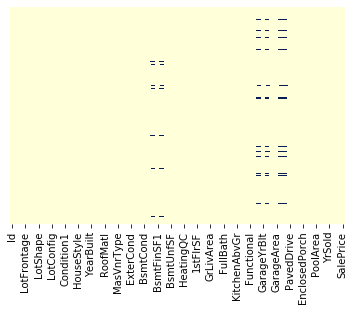

In [545]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [676]:
#  awsm.

MissHandle_col=df.isnull().sum()>0
col_to_be_handle=MissHandle_col[MissHandle_col].index.tolist()
df[col_to_be_handle].isnull().sum()

BsmtFinType1    37
BsmtFinType2    38
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [677]:
# Here we will take permutation methods.
permutation = np.random.permutation(df['BsmtFinType1'])
empty_is = np.where(permutation == "")
permutation = np.delete(permutation, empty_is)
end = len(permutation)
df['BsmtFinType1'] = df['BsmtFinType1'].apply(lambda x: permutation[np.random.randint(end)] if pd.isnull(x) else x)

In [678]:
# lets take mode method here
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [679]:
MissHandle_col=df.isnull().sum()>0
col_to_be_handle=MissHandle_col[MissHandle_col].index.tolist()
df[col_to_be_handle].isnull().sum()

BsmtFinType1     1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [680]:
# Here we will take permutation methods.
permutation = np.random.permutation(df['GarageType'])
empty_is = np.where(permutation == "")
permutation = np.delete(permutation, empty_is)
end = len(permutation)
df['GarageType'] = df['GarageType'].apply(lambda x: permutation[np.random.randint(end)] if pd.isnull(x) else x)

In [681]:
# Here we will take permutation methods.
permutation = np.random.permutation(df['GarageFinish'])
empty_is = np.where(permutation == "")
permutation = np.delete(permutation, empty_is)
end = len(permutation)
df['GarageFinish']= df['GarageFinish'].apply(lambda x: permutation[np.random.randint(end)] if pd.isnull(x) else x)

In [552]:
# Here we will take permutation methods.
permutation = np.random.permutation(df['GarageQual'])
empty_is = np.where(permutation == "")
permutation = np.delete(permutation, empty_is)
end = len(permutation)
df['GarageQual']= df['GarageQual'].apply(lambda x: permutation[np.random.randint(end)] if pd.isnull(x) else x)

In [682]:
MissHandle_col=df.isnull().sum()>0
col_to_be_handle=MissHandle_col[MissHandle_col].index.tolist()
df[col_to_be_handle].isnull().sum()

BsmtFinType1     1
GarageType       6
GarageFinish     5
GarageQual      81
GarageCond      81
dtype: int64

In [683]:
# lets take mode method here

df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [684]:
MissHandle_col=df.isnull().sum()>0
col_to_be_handle=MissHandle_col[MissHandle_col].index.tolist()
df[col_to_be_handle].isnull().sum()

BsmtFinType1     1
GarageType       6
GarageFinish     5
GarageQual      81
dtype: int64

In [561]:
df[df['BsmtQual'].isna()].BsmtQual

259    NaN
Name: BsmtQual, dtype: object

In [685]:
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [686]:
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])

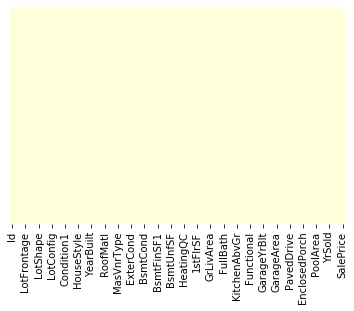

In [687]:

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

## Encoding of categorical feature

In [688]:

df.shape

(1460, 76)

In [689]:
cat_col = df.select_dtypes(exclude=[np.number]).columns   
cat_col 

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [690]:
def category_onehot_multcols(multcolumns):
    df_final=Combined_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(Combined_df[fields],drop_first=True)
        
        Combined_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([Combined_df,df_final],axis=1)
        
    return df_final

## Combining both train and test data

In [691]:
df.shape

(1460, 76)

In [692]:
df.drop(['Id'],axis=1,inplace=True)


In [693]:
# before combining let keep a copy

main_df=df.copy()

In [694]:
main_df.shape

(1460, 75)

In [695]:
# Lets combine now
test_df=pd.read_csv('NonNulltest.csv')

In [696]:
test_df.shape

(1459, 74)

In [697]:
Combined_df=pd.concat([df,test_df],axis=0)

C:\Users\Rajeev Ranjan\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [698]:
Combined_df.shape

(2919, 75)

In [699]:
df['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [700]:
Combined_df.shape

(2919, 75)

In [701]:
Combined_df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [702]:

Combined_df=category_onehot_multcols(cat_col)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [703]:
Combined_df.shape

(2919, 233)

In [704]:

Combined_df =Combined_df.loc[:,~Combined_df.columns.duplicated()]

In [705]:
Combined_df.shape

(2919, 177)

In [706]:
Combined_df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,1,0,0,0,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,1,0,0,0,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,1,0,0,0,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,1,0,0,0,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,1,0,0,0,1,0


In [707]:
df_train=Combined_df.iloc[:1460,:]


In [708]:
df_test=Combined_df.iloc[1460:,:]

In [709]:
df_train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,1,0,0,0,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,1,0,0,0,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,1,0,0,0,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,1,0,0,0,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,1,0,0,0,1,0


In [710]:
df_test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,896,0,0,2,468.0,144.0,0.0,0.0,270.0,0,...,0,0,0,0,1,0,0,0,1,0
1,1329,0,0,3,923.0,0.0,0.0,0.0,406.0,0,...,0,0,0,0,1,0,0,0,1,0
2,928,701,0,3,791.0,0.0,0.0,0.0,137.0,0,...,0,0,0,0,1,0,0,0,1,0
3,926,678,0,3,602.0,0.0,0.0,0.0,324.0,0,...,0,0,0,0,1,0,0,0,1,0
4,1280,0,0,2,263.0,0.0,0.0,0.0,1017.0,0,...,0,0,0,0,1,0,0,0,1,0


In [711]:
df_test.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\Rajeev Ranjan\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [712]:
X_train=df_train.drop(['SalePrice'],axis=1)
y_train=df_train['SalePrice']

In [713]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,y_train)

C:\Users\Rajeev Ranjan\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [714]:
print(model.feature_importances_)

[2.86325260e-02 1.60613245e-02 1.73809034e-03 1.56921215e-02
 2.49044186e-02 7.98616246e-03 1.23851564e-02 3.65338741e-03
 2.64304300e-02 8.18474472e-03 1.30177001e-02 7.99499325e-03
 2.64509393e-02 1.25107847e-02 2.80064875e-02 2.51766956e-02
 8.92985355e-03 2.11015495e-03 2.46696190e-02 2.49499209e-02
 1.27838109e-03 1.18089645e-02 1.92009366e-02 4.46617368e-03
 2.66763632e-02 2.21889507e-02 1.45960696e-02 2.20516033e-02
 4.37272108e-04 6.19022730e-03 2.11392646e-02 2.68048291e-02
 2.21868753e-02 2.43879196e-02 2.58865909e-02 2.83850957e-02
 1.27082381e-03 6.79016728e-04 6.56482901e-03 2.97233444e-03
 1.40791469e-04 2.68743016e-03 5.51564423e-04 1.32709669e-02
 2.14075141e-03 1.68267047e-03 5.40622483e-03 1.38559046e-04
 3.56872373e-03 2.58509767e-03 3.43793121e-04 1.35500879e-02
 2.89182539e-03 7.37010951e-04 6.87586243e-05 5.46840607e-04
 1.80391629e-03 8.74056924e-04 5.72399846e-03 2.56909882e-03
 5.16049509e-03 3.03270300e-03 1.62311630e-03 5.82425957e-04
 2.19526407e-03 6.326345

In [762]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_Train.columns)
top_10=feat_importances.nlargest(10).index.to_list()

top_30=feat_importances.nlargest(30).index.to_list()

top_50=feat_importances.nlargest(50).index.to_list()

top_100=feat_importances.nlargest(100).index.to_list()
top_150=feat_importances.nlargest(150).index.to_list()

In [763]:
X_train10=X_train[top_10]
X_train30=X_train[top_30]
X_train50=X_train[top_50]
X_train100=X_train[top_100]
X_train150=X_train[top_150]

## Prediction

In [764]:
import xgboost
regressor=xgboost.XGBRegressor()

In [765]:
import xgboost
classifier=xgboost.XGBRegressor()

In [766]:

booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [768]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500,700]
max_depth = [2, 3, 5,8, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [769]:
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [770]:
random_cv.fit(X_train150,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   18.5s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  7.4min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 12.6min finished


[13:19:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                   iid='warn', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree',

In [771]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [772]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [773]:
regressor.fit(X_train150,y_train)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [774]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [775]:
X_Test=df_test
X_Test150=X_Test[top_150]

In [776]:

y_pred=regressor.predict(X_Test150)

In [777]:

y_pred

array([118863.24 , 162903.23 , 186528.08 , ..., 169731.92 , 119990.016,
       234097.53 ], dtype=float32)

In [778]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)


In [779]:
datasets.head()

,Id,0
0,1461,118863.242188
1,1462,162903.234375
2,1463,186528.078125
3,1464,194116.265625
4,1465,197116.312500


In [780]:
datasets.columns=['Id','SalePrice']
datasets.head(1)

,Id,SalePrice
0,1461,118863.242188


In [781]:
datasets.to_csv('sample_submission.csv',index=False)

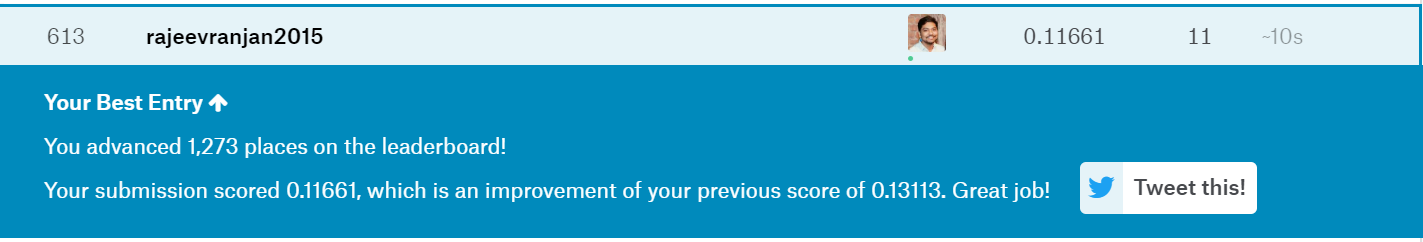

## Let's try out ANN


In [619]:

pred.columns=['SalePrice']
pred.head(1)

,SalePrice
0,117716.21875


In [627]:
temp_df=df['SalePrice'].copy()
temp_df.column=['SalePrice']

In [629]:
df_train1=pd.concat([df_train,temp_df],axis=1)
df_train1.head(1)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial,SalePrice
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,1,0,0,0,1,0,208500


In [632]:
df_test1=pd.concat([df_test,pred],axis=1)
df_test1.head(1)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial,SalePrice
0,896,0,0,2,468.0,144.0,0.0,0.0,270.0,0,...,0,0,0,1,0,0,0,1,0,117716.21875


In [634]:

df_train=pd.concat([df_train1,df_test1],axis=0)
df_train.shape

(2919, 177)

In [651]:

X_Train=df_train.drop(['SalePrice'],axis=1)
y_Train=df_train['SalePrice']


## Algorithm 

In [645]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from math import sqrt



# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu',input_dim = 176))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 25, init = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'he_uniform'))

# Compiling the ANN
classifier.compile(loss='mse', optimizer='Adamax')

# Fitting the ANN to the Training set
model_history=classifier.fit(X_Train.values, y_Train.values,validation_split=0.20, batch_size = 10, nb_epoch = 1000)

C:\Users\Rajeev Ranjan\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=176, units=50, kernel_initializer="he_uniform")`
  app.launch_new_instance()
C:\Users\Rajeev Ranjan\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=25, kernel_initializer="he_uniform")`
C:\Users\Rajeev Ranjan\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=50, kernel_initializer="he_uniform")`
C:\Users\Rajeev Ranjan\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, kernel_initializer="he_uniform")`
C:\Users\Rajeev Ranjan\AppData\Local\Continuum\Anaconda3\lib\


Train on 2335 samples, validate on 584 samples
Epoch 1/1000
2335/2335 [==============================] - 1s 311us/step - loss: 19771876296.4968 - val_loss: 4067914218.8493
Epoch 2/1000
2335/2335 [==============================] - 1s 267us/step - loss: 5923577057.0278 - val_loss: 3798675023.5616
Epoch 3/1000
2335/2335 [==============================] - 1s 290us/step - loss: 5320371699.6660 - val_loss: 3490233531.1781
Epoch 4/1000
2335/2335 [==============================] - 1s 248us/step - loss: 4811956250.8608 - val_loss: 3242581962.0822
Epoch 5/1000
2335/2335 [==============================] - 1s 265us/step - loss: 4354894937.0792 - val_loss: 3040224781.5890
Epoch 6/1000
2335/2335 [==============================] - 1s 292us/step - loss: 3946505155.0150 - val_loss: 2794155185.5342
Epoch 7/1000
2335/2335 [==============================] - 1s 273us/step - loss: 3564557001.7302 - val_loss: 2562490173.6986
Epoch 8/1000
2335/2335 [==============================] - 1s 278us/step - loss: 323

2335/2335 [==============================] - 1s 222us/step - loss: 1106670273.4732 - val_loss: 1018102136.8767
Epoch 130/1000
2335/2335 [==============================] - 1s 266us/step - loss: 1119364956.3340 - val_loss: 867832847.7808
Epoch 131/1000
2335/2335 [==============================] - 1s 222us/step - loss: 1098504414.6638 - val_loss: 869824211.5753
Epoch 132/1000
2335/2335 [==============================] - 1s 221us/step - loss: 1101257685.0364 - val_loss: 853717318.3836
Epoch 133/1000
2335/2335 [==============================] - 1s 233us/step - loss: 1101476537.4904 - val_loss: 892887856.0548
Epoch 134/1000
2335/2335 [==============================] - 1s 233us/step - loss: 1110064275.6660 - val_loss: 858485784.3014
Epoch 135/1000
2335/2335 [==============================] - 1s 218us/step - loss: 1095472577.2677 - val_loss: 865946849.7808
Epoch 136/1000
2335/2335 [==============================] - 1s 258us/step - loss: 1093095570.9122 - val_loss: 858360026.5479
Epoch 137/1000

Epoch 195/1000
2335/2335 [==============================] - 1s 264us/step - loss: 928831050.3983 - val_loss: 702217983.0137
Epoch 196/1000
2335/2335 [==============================] - 1s 249us/step - loss: 945058674.0899 - val_loss: 715098360.6027
Epoch 197/1000
2335/2335 [==============================] - 1s 274us/step - loss: 924263116.7109 - val_loss: 700688455.7260
Epoch 198/1000
2335/2335 [==============================] - 1s 225us/step - loss: 935941742.5096 - val_loss: 708401146.8493
Epoch 199/1000
2335/2335 [==============================] - 1s 259us/step - loss: 917999636.2484 - val_loss: 741185354.9041
Epoch 200/1000
2335/2335 [==============================] - 1s 254us/step - loss: 924569233.6103 - val_loss: 681737724.5342
Epoch 201/1000
2335/2335 [==============================] - 0s 204us/step - loss: 918421353.3876 - val_loss: 679246922.0274
Epoch 202/1000
2335/2335 [==============================] - 1s 298us/step - loss: 922214411.4090 - val_loss: 736023832.8493
Epoch 20

2335/2335 [==============================] - 1s 225us/step - loss: 699265874.7752 - val_loss: 535323679.8082
Epoch 262/1000
2335/2335 [==============================] - 1s 274us/step - loss: 682205409.8330 - val_loss: 554908723.4521
Epoch 263/1000
2335/2335 [==============================] - 1s 297us/step - loss: 699357255.0578 - val_loss: 506716133.5205
Epoch 264/1000
2335/2335 [==============================] - 1s 283us/step - loss: 699087334.2013 - val_loss: 656633701.0411
Epoch 265/1000
2335/2335 [==============================] - 1s 271us/step - loss: 682736485.2505 - val_loss: 521603149.9863
Epoch 266/1000
2335/2335 [==============================] - 1s 285us/step - loss: 671548776.9764 - val_loss: 532882009.6438
Epoch 267/1000
2335/2335 [==============================] - 1s 237us/step - loss: 670727831.4347 - val_loss: 538717330.7397
Epoch 268/1000
2335/2335 [==============================] - 1s 261us/step - loss: 668901567.6231 - val_loss: 519443421.7534
Epoch 269/1000
2335/233

2335/2335 [==============================] - 1s 263us/step - loss: 471259622.0214 - val_loss: 508006083.3904
Epoch 394/1000
2335/2335 [==============================] - 1s 221us/step - loss: 482820262.5782 - val_loss: 420998080.4110
Epoch 395/1000
2335/2335 [==============================] - 1s 263us/step - loss: 479781005.8415 - val_loss: 423528476.2466
Epoch 396/1000
2335/2335 [==============================] - 1s 227us/step - loss: 488757664.9251 - val_loss: 455405478.6918
Epoch 397/1000
2335/2335 [==============================] - 1s 263us/step - loss: 467296459.6488 - val_loss: 432999542.3973
Epoch 398/1000
2335/2335 [==============================] - 1s 225us/step - loss: 467510126.1670 - val_loss: 447563626.0959
Epoch 399/1000
2335/2335 [==============================] - 1s 234us/step - loss: 497781198.1670 - val_loss: 562418078.2192
Epoch 400/1000
2335/2335 [==============================] - 1s 265us/step - loss: 472358428.4540 - val_loss: 485375303.3151
Epoch 401/1000
2335/233

2335/2335 [==============================] - 1s 225us/step - loss: 399612745.1649 - val_loss: 500935377.6301
Epoch 526/1000
2335/2335 [==============================] - 1s 263us/step - loss: 415893238.8865 - val_loss: 473145343.5959
Epoch 527/1000
2335/2335 [==============================] - 1s 223us/step - loss: 394701910.3383 - val_loss: 422967088.2192
Epoch 528/1000
2335/2335 [==============================] - 1s 239us/step - loss: 408267309.5332 - val_loss: 441702980.4521
Epoch 529/1000
2335/2335 [==============================] - 1s 258us/step - loss: 434879401.1906 - val_loss: 400537499.3151
Epoch 530/1000
2335/2335 [==============================] - 1s 228us/step - loss: 405589859.5289 - val_loss: 451037237.9315
Epoch 531/1000
2335/2335 [==============================] - 1s 263us/step - loss: 417606071.5032 - val_loss: 567712088.8082
Epoch 532/1000
2335/2335 [==============================] - 1s 218us/step - loss: 396373665.3876 - val_loss: 401375332.2877
Epoch 533/1000
2335/233

2335/2335 [==============================] - 1s 227us/step - loss: 357129302.4069 - val_loss: 354151512.2603
Epoch 658/1000
2335/2335 [==============================] - 1s 235us/step - loss: 366862924.4368 - val_loss: 335100538.9932
Epoch 659/1000
2335/2335 [==============================] - 1s 286us/step - loss: 374202240.9422 - val_loss: 333788956.1027
Epoch 660/1000
2335/2335 [==============================] - 1s 269us/step - loss: 344455456.6167 - val_loss: 412261878.4658
Epoch 661/1000
2335/2335 [==============================] - 1s 284us/step - loss: 347335153.6959 - val_loss: 321810216.1849
Epoch 662/1000
2335/2335 [==============================] - 1s 251us/step - loss: 340843911.8544 - val_loss: 361843185.4795
Epoch 663/1000
2335/2335 [==============================] - 1s 233us/step - loss: 351183535.3490 - val_loss: 369397305.8082
Epoch 664/1000
2335/2335 [==============================] - 1s 265us/step - loss: 363916260.7281 - val_loss: 465945141.9041
Epoch 665/1000
2335/233

Epoch 789/1000
2335/2335 [==============================] - 1s 244us/step - loss: 321983023.6403 - val_loss: 360465560.4521
Epoch 790/1000
2335/2335 [==============================] - 1s 270us/step - loss: 319148245.0535 - val_loss: 399304023.6849
Epoch 791/1000
2335/2335 [==============================] - 1s 226us/step - loss: 312338891.5203 - val_loss: 369776617.6712
Epoch 792/1000
2335/2335 [==============================] - 1s 267us/step - loss: 305902695.2206 - val_loss: 355526892.1438
Epoch 793/1000
2335/2335 [==============================] - 1s 218us/step - loss: 318683252.1799 - val_loss: 311545199.9247
Epoch 794/1000
2335/2335 [==============================] - 1s 267us/step - loss: 319589342.3983 - val_loss: 347915279.2329
Epoch 795/1000
2335/2335 [==============================] - 1s 233us/step - loss: 312631447.9829 - val_loss: 401310095.6301
Epoch 796/1000
2335/2335 [==============================] - 1s 233us/step - loss: 302923637.7901 - val_loss: 326006307.3425
Epoch 79

2335/2335 [==============================] - 0s 185us/step - loss: 302013640.3426 - val_loss: 301357789.5479
Epoch 856/1000
2335/2335 [==============================] - 1s 275us/step - loss: 310719333.3448 - val_loss: 294313081.6575
Epoch 857/1000
2335/2335 [==============================] - 1s 290us/step - loss: 300380219.7773 - val_loss: 282073489.2671
Epoch 858/1000
2335/2335 [==============================] - 1s 267us/step - loss: 315528992.8737 - val_loss: 294235289.2397
Epoch 859/1000
2335/2335 [==============================] - 1s 278us/step - loss: 308480099.9400 - val_loss: 282045040.0959
Epoch 860/1000
2335/2335 [==============================] - 1s 271us/step - loss: 308269485.7987 - val_loss: 329478712.6164
Epoch 861/1000
2335/2335 [==============================] - 1s 260us/step - loss: 302582963.1606 - val_loss: 291327979.9452
Epoch 862/1000
2335/2335 [==============================] - 1s 284us/step - loss: 297157970.5096 - val_loss: 313542798.2329
Epoch 863/1000
2335/233

Epoch 921/1000
2335/2335 [==============================] - 1s 274us/step - loss: 287025860.2056 - val_loss: 275192698.0205
Epoch 922/1000
2335/2335 [==============================] - 1s 226us/step - loss: 283146450.9036 - val_loss: 437276871.3288
Epoch 923/1000
2335/2335 [==============================] - 1s 217us/step - loss: 278916011.6831 - val_loss: 274749150.3253
Epoch 924/1000
2335/2335 [==============================] - 1s 249us/step - loss: 302638127.3490 - val_loss: 305028106.2260
Epoch 925/1000
2335/2335 [==============================] - 1s 222us/step - loss: 279498377.0835 - val_loss: 288281974.5616
Epoch 926/1000
2335/2335 [==============================] - 1s 301us/step - loss: 268383686.8865 - val_loss: 398991069.2192
Epoch 927/1000
2335/2335 [==============================] - 1s 275us/step - loss: 290326622.2270 - val_loss: 335733763.2363
Epoch 928/1000
2335/2335 [==============================] - 1s 240us/step - loss: 288639121.7901 - val_loss: 437898584.4932
Epoch 92

2335/2335 [==============================] - 1s 261us/step - loss: 275456120.2827 - val_loss: 369584273.5068
Epoch 988/1000
2335/2335 [==============================] - 1s 284us/step - loss: 278140361.7473 - val_loss: 261881835.9349
Epoch 989/1000
2335/2335 [==============================] - 1s 269us/step - loss: 281348469.6531 - val_loss: 252235012.9932
Epoch 990/1000
2335/2335 [==============================] - 1s 232us/step - loss: 288727418.9807 - val_loss: 292037175.0616
Epoch 991/1000
2335/2335 [==============================] - 1s 286us/step - loss: 284236374.4240 - val_loss: 265682306.7123
Epoch 992/1000
2335/2335 [==============================] - 1s 242us/step - loss: 265984852.6681 - val_loss: 266885520.2123
Epoch 993/1000
2335/2335 [==============================] - 1s 257us/step - loss: 275138089.8351 - val_loss: 276745355.9658
Epoch 994/1000
2335/2335 [==============================] - 1s 249us/step - loss: 284260274.0214 - val_loss: 270029422.1644
Epoch 995/1000
2335/233

In [647]:
ann_pred=classifier.predict(df_test1.drop(['SalePrice'],axis=1).values)

In [648]:

##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(ann_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

### No improvement at all.